In [749]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gamma
from matplotlib.pyplot import figure


#Plot settings
plt.rcParams["font.family"]='serif'
#plt.rcParams["figure.figsize"][0] = 16
#plt.rcParams["figure.figsize"][1] = 10
plt.rcParams['errorbar.capsize']=4

**Part 2**

In [750]:
#We measure in 2048 channels
channels = np.arange(0,2048)

#Conversion from channels to energies using a result from a fit we perform later
conv = 0.001218182710900028 #MeV/channel ( = popt[0], see below) 0.001218182710900028

energies = channels * conv #MeV

**CO Spektrum**

In [751]:
#relevant DATA
peaks_Co = np.array([974, 1107]) * conv
fwhm_Co = np.array([40,55]) * conv

#X-ray of lead
peakCo_Pb = 148 * conv 
fwhmCo_Pb = 2 * conv

#Compton edge
compton_Co = [192*conv, 746*conv, 859*conv] 
compton_Co_err = [7 * conv, 7 * conv, 7 * conv] 

print(peaks_Co, '+-', fwhm_Co)

[1.18650996 1.34852826] +- [0.04872731 0.06700005]


In [752]:

#checking the copmton edges
print('Theorie y_1: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(peaks_Co[1] * 3/4, fwhm_Co[1] * 3/4, peaks_Co[1] * 1/4, fwhm_Co[1] * 1/4))
print('Theorie y_2: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(peaks_Co[0] * 3/4, fwhm_Co[0] * 3/4, peaks_Co[0] * 1/4, fwhm_Co[0] * 1/4))
print('Experimentell y_1: Compton edge = %f +- %f' 
      %(compton_Co[2], compton_Co_err[2]))
print('Experimentell y_2: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(compton_Co[1], compton_Co_err[1], compton_Co[0], compton_Co_err[0]))

Theorie y_1: Compton edge = 1.011396 +- 0.050250, Backscattering = 0.337132 +- 0.016750
Theorie y_2: Compton edge = 0.889882 +- 0.036545, Backscattering = 0.296627 +- 0.012182
Experimentell y_1: Compton edge = 1.046419 +- 0.008527
Experimentell y_2: Compton edge = 0.908764 +- 0.008527, Backscattering = 0.233891 +- 0.008527


In [753]:
#.txt , to .
with open('FP82Data/EN960.txt', 'r+') as f:
    text = f.read()
    f.seek(0)
    f.truncate()
    f.write(text.replace(' . ', '.'))

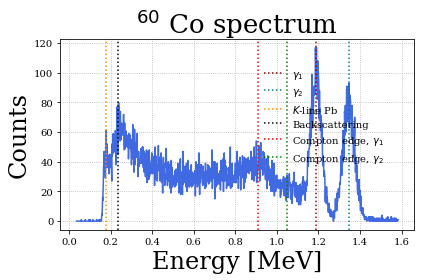

<Figure size 432x288 with 0 Axes>

In [754]:
#plot
co_counts  = np.loadtxt(r'FP82Data/EN960.txt', unpack=True)
co_counts = co_counts[30:1300]
energies = energies[30:1300]

#Plotting the result
%matplotlib inline
plt.plot(energies, co_counts, color = 'royalblue')
plt.title('$^{60}$ Co spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
#plt.xlim(0,1.7)
plt.grid(ls='dotted')

plt.axvline(x = peaks_Co[0], ls = 'dotted', color = 'darkred', lw = 1.5, label = r'$\gamma_1$')
plt.axvline(x = peaks_Co[1], ls = 'dotted', color = 'teal', lw = 1.5, label = r'$\gamma_2$')
plt.axvline(x = peakCo_Pb, ls = 'dotted', color = 'darkorange', lw = 1.5, label = r'$K$-line Pb')
plt.axvline(x = compton_Co[0], ls = 'dotted', color = 'black', lw = 1.5, label = r'Backscattering')
plt.axvline(x = compton_Co[1], ls = 'dotted', color = 'red', lw = 1.5, label = r'Compton edge, $\gamma_1$')
plt.axvline(x = compton_Co[2], ls = 'dotted', color = 'green', lw = 1.5, label = r'Compton edge, $\gamma_2$')
#plt.axvline(148)

plt.legend(frameon=False,fontsize='medium', borderpad=1.5, borderaxespad=1.5,loc='best')


#Saving the result
plt.tight_layout()
plt.show()
plt.savefig('FP82Plots/Co60.pdf')

**CS Spektrum**

In [755]:
with open('FP82Data/EW684.txt', 'r+') as g:
    text = g.read()
    g.seek(0)
    g.truncate()
    g.write(text.replace(',', '.'))

In [756]:
#relevant DATA
peaks_Cs = np.array([557]) * conv
fwhm_Cs = np.array([38]) * conv

#X-ray of lead
peakCs_Pb = 174 * conv
fwhmCs_Pb = 4 * conv

#Compton edge
compton_Cs = 398 * conv
compton_Cs_err = 4 * conv

print(peaks_Cs, '+-', fwhm_Cs)

[0.67852777] +- [0.04629094]


In [757]:
#checking the copmton edges
print('Theorie y: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(peaks_Cs[0] * 3/4, fwhm_Cs[0] * 3/4, peaks_Cs[0] * 1/4, fwhm_Cs[0] * 1/4))
print('Experimentell y: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(compton_Cs[1], compton_Cs_err[1], compton_Cs[0], compton_Cs_err[0]))

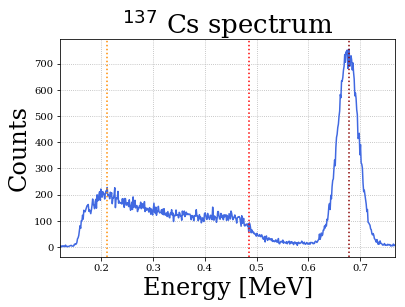

<Figure size 432x288 with 0 Axes>

In [758]:
cs_counts  = np.loadtxt(r'FP82Data/EW684.txt', unpack=True)
cs_counts = cs_counts[30:1300]


#Plotting the result

plt.plot(energies, cs_counts, color = 'royalblue')
plt.title('$^{137}$ Cs spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim(100 * conv,630 * conv)
plt.grid(ls='dotted')

plt.axvline(x = peaks_Cs[0], ls = 'dotted', color = 'darkred', lw = 1.5, label = r'$\gamma$')
plt.axvline(x = peakCs_Pb, ls = 'dotted', color = 'darkorange', lw = 1.5, label = r'$K$-line Pb')
plt.axvline(x = compton_Cs, ls = 'dotted', color = 'red', lw = 1.5, label = r'Compton edge')
#plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
#plt.axvline(174)
#print(cs_counts[380:405])

#Saving the result
plt.show()
plt.tight_layout()
plt.savefig('FP82Plots/Cs137.pdf')

**BA Spektrum**

In [759]:
with open('FP82Data/A4201.txt', 'r+') as a:
    text = a.read()
    a.seek(0)
    a.truncate()
    a.write(text.replace(',', '.'))

In [760]:
#relevant DATA
peaks_Ba = np.array([306]) * conv
fwhm_Ba = np.array([27]) * conv

#X-ray of lead
peakBa_Pb = 146 * conv
fwhmBa_Pb = 0.008

#Compton edge
compton_Ba = 262 * conv
compton_Ba_err = 4 * conv

print(peaks_Ba, '+-', fwhm_Ba)

[0.37276391] +- [0.03289093]


In [761]:
#checking the copmton edges
print('Theorie y: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(peaks_Ba * 3/4, fwhm_Ba * 3/4, peaks_Ba * 1/4, fwhm_Ba * 1/4))
print('Experimentell y: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(compton_Ba, compton_Ba_err, peakBa_Pb, fwhmBa_Pb))

Theorie y: Compton edge = 0.279573 +- 0.024668, Backscattering = 0.093191 +- 0.008223
Experimentell y: Compton edge = 0.319164 +- 0.004873, Backscattering = 0.177855 +- 0.008000


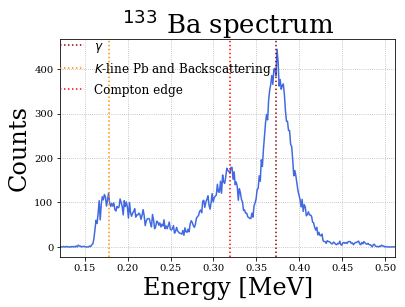

<Figure size 432x288 with 0 Axes>

In [762]:
ba_counts  = np.loadtxt(r'FP82Data/A4201.txt', unpack=True)
ba_counts = ba_counts[30:1300]

#Plotting the result
plt.plot(energies, ba_counts, color = 'royalblue')
plt.title('$^{133}$ Ba spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim(100*conv,420*conv)
plt.grid(ls='dotted')

plt.axvline(x = peaks_Ba[0], ls = 'dotted', color = 'darkred', lw = 1.5, label = r'$\gamma$')
plt.axvline(x = peakBa_Pb, ls = 'dotted', color = 'darkorange', lw = 1.5, label = r'$K$-line Pb and Backscattering')
plt.axvline(x = compton_Ba, ls = 'dotted', color = 'red', lw = 1.5, label = r'Compton edge')
plt.legend(frameon=False,fontsize='large', borderpad=0, borderaxespad=0)#,loc='best'
#plt.axvline(262*conv)
#plt.axvline(146*conv)
#print(cs_counts[255:270])
#print(max(cs_counts[255:270]))

#Saving the result
plt.show()
plt.tight_layout()
plt.savefig('FP82Plots/Ba133.pdf')

**Mn Spektrum**

In [763]:
with open('FP82Data/AC9339.txt', 'r+') as c:
    text = c.read()
    c.seek(0)
    c.truncate()
    c.write(text.replace(',', '.'))

In [764]:
#relevant DATA
peaks_Mn = np.array([694]) * conv
fwhm_Mn = np.array([42]) * conv

#X-ray of lead
peakMn_Pb = 181 * conv
fwhmMn_Pb = 0.008

#Compton edge
compton_Mn = [305 * conv, 519 * conv]
compton_Mn_err = [0.029, 0.020]

print(peaks_Mn, '+-', fwhm_Mn)

[0.8454188] +- [0.05116367]


In [765]:
#checking the copmton edges
print('Theorie y: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(peaks_Mn * 3/4, fwhm_Mn * 3/4, peaks_Mn * 1/4, fwhm_Mn * 1/4))
print('Experimentell y: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(compton_Mn[1], compton_Mn_err[1], compton_Mn[0], compton_Mn_err[0]))

Theorie y: Compton edge = 0.634064 +- 0.038373, Backscattering = 0.211355 +- 0.012791
Experimentell y: Compton edge = 0.632237 +- 0.020000, Backscattering = 0.371546 +- 0.029000


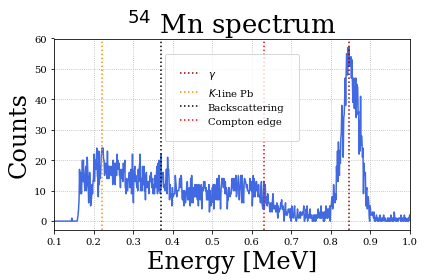

In [766]:
mn_counts  = np.loadtxt(r'FP82Data/AC9339.txt', unpack=True)
mn_counts  = mn_counts[30:1300]

#Plotting the result
plt.plot(energies, mn_counts, color = 'royalblue')
plt.title('$^{54}$ Mn spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim( .1,1)
plt.grid(ls='dotted')

plt.axvline(x = peaks_Mn, ls = 'dotted', color = 'darkred', lw = 1.5, label = r'$\gamma$')
plt.axvline(x = peakMn_Pb, ls = 'dotted', color = 'darkorange', lw = 1.5, label = r'$K$-line Pb')
plt.axvline(x = compton_Mn[0], ls = 'dotted', color = 'black', lw = 1.5, label = r'Backscattering')
plt.axvline(x = compton_Mn[1], ls = 'dotted', color = 'red', lw = 1.5, label = r'Compton edge')
plt.legend(frameon=True,fontsize='medium', borderpad=1.5, borderaxespad=1.5,loc='best')
#plt.axvline(694*conv)
#plt.axvline(305*conv)
#plt.axvline(181*conv)

#Saving the result
plt.tight_layout()
plt.savefig('FP82Plots/Mn54.pdf')

**Na Spektrum**

In [767]:
with open('FP82Data/GE501.txt', 'r+') as b:
    text = b.read()
    b.seek(0)
    b.truncate()
    b.write(text.replace(',', '.'))

In [768]:
#relevant DATA
peaks_Na = np.array([1054]) * conv
fwhm_Na = np.array([51]) * conv

#Gamma peak
gamma_Na = 432 * conv
gamma_Na_err = 0.041

#X-ray of lead
peakNa_Pb = 161 * conv
fwhmNa_Pb = 0.015

#Compton edge
compton_Na = [273 * conv, 320 * conv, 801 * conv]
compton_Na_err = [0.048, 0.012, 0.02]

print(peaks_Na, '+-', fwhm_Na)

[1.28396458] +- [0.06212732]


In [769]:
#checking the copmton edges
print('Theorie y_1: Compton edge = %f +- %f'
      %(peaks_Na * 3/4, fwhm_Na * 3/4))
print('Theorie y_2: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(gamma_Na * 3/4, gamma_Na_err * 3/4, gamma_Na * 1/4, gamma_Na_err * 1/4))
print('Experimentell y_1: Compton edge = %f +- %f' 
      %(compton_Na[2], compton_Na_err[2]))
print('Experimentell y_2: Compton edge = %f +- %f, Backscattering = %f +- %f' 
      %(compton_Na[1], compton_Na_err[1], compton_Na[0], compton_Na_err[0]))

Theorie y_1: Compton edge = 0.962973 +- 0.046595
Theorie y_2: Compton edge = 0.394691 +- 0.030750, Backscattering = 0.131564 +- 0.010250
Experimentell y_1: Compton edge = 0.975764 +- 0.020000
Experimentell y_2: Compton edge = 0.389818 +- 0.012000, Backscattering = 0.332564 +- 0.048000


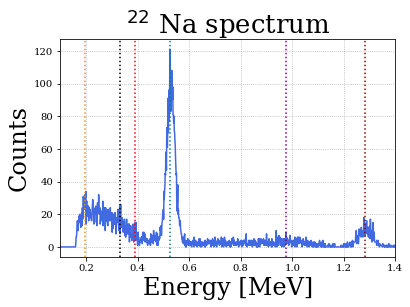

<Figure size 432x288 with 0 Axes>

In [770]:
na_counts  = np.loadtxt(r'FP82Data/GE501.txt', unpack=True)
na_counts  = na_counts[30:1300]

#Plotting the result
plt.plot(energies, na_counts, color = 'royalblue')
plt.title('$^{22}$ Na spectrum', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim(0.1,1.4)
plt.grid(ls='dotted')

plt.axvline(x = peaks_Na, ls = 'dotted', color = 'darkred', lw = 1.5, label = r'$\gamma_1$')
plt.axvline(x = gamma_Na, ls = 'dotted', color = 'teal', lw = 1.5, label = r'$\gamma_2$')
plt.axvline(x = peakNa_Pb, ls = 'dotted', color = 'darkorange', lw = 1.5, label = r'$K$-line Pb')
plt.axvline(x = compton_Na[0], ls = 'dotted', color = 'black', lw = 1.5, label = r'Backscattering, $\gamma_2$')
plt.axvline(x = compton_Na[1], ls = 'dotted', color = 'red', lw = 1.5, label = r'Compton edge, $\gamma_2$')
plt.axvline(x = compton_Na[2], ls = 'dotted', color = 'purple', lw = 1.5, label = r'Compton edge, $\gamma_1$')
#plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
#plt.axvline(432 * conv)
#plt.axvline(320 * conv)
#plt.axvline(273)
#plt.axvline(161)

#Saving the result
plt.show()
#plt.tight_layout()
plt.savefig('FP82Plots/Na22.pdf')

In [771]:
#Comparison of the lowest energys to x-radiation of lead
K0_Pb = np.array([peakCo_Pb, peakCs_Pb, peakMn_Pb, peakNa_Pb, peakBa_Pb])
K_Pb = np.mean(K0_Pb)
K_Pb_err = np.std(K0_Pb)
print(K_Pb, K_Pb_err)

0.19734559916580455 0.01686204266520542


**Energie Kallibration**

In [772]:
#Looking for the peaks in our measured spectra. Order: Co, Co, Cs, Mn, Na
channels2 = np.array([peaks_Co[0], peaks_Co[1], peaks_Cs[0], peaks_Ba[0], peaks_Mn[0], peaks_Na[0]])

#Standard deviation from FWHM
channels2_err = np.array([fwhm_Co[0], fwhm_Co[1], fwhm_Cs[0], fwhm_Ba[0], fwhm_Mn[0], fwhm_Na[0]]/(2 * np.sqrt(2 * np.log(2))))

#Theoretical values from script
energies_theo = np.array([1.17323, 1.33248, 0.6616, 0.382 , 0.8353, 1.2746]) #MeV

In [773]:
#Linear Fit
def linear(x,a):
    return a*x

popt, pcov = curve_fit(linear, channels2/conv, energies_theo, sigma = channels2_err/conv)
fitrange = np.linspace(0,1300,2)

print('The energy gain per channel has been determined to:')
print('G = (' + str(popt[0]*1e3) + ' +/- ' + str(np.sqrt(pcov[0,0])*1e3) + ') keV/channel.')

The energy gain per channel has been determined to:
G = (1.2062376439077185 +/- 0.00552240806134435) keV/channel.


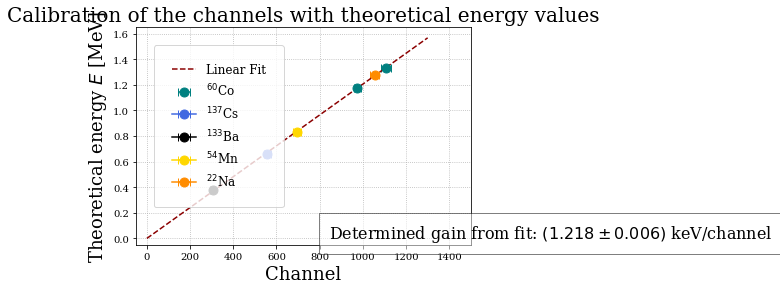

In [774]:
#Plotting the result
plt.errorbar(channels2[:2] / conv, energies_theo[:2], xerr = channels2_err[:2] / conv, color = 'teal',label = r'$^{60}$Co', marker = 'o', ls = ' ', ms = 9)
plt.errorbar(channels2[2] / conv, energies_theo[2], xerr = channels2_err[2] / conv,color = 'royalblue',label = r'$^{137}$Cs', marker = 'o', ms = 9)
plt.errorbar(channels2[3] / conv, energies_theo[3], xerr = channels2_err[3] / conv,color = 'black',label = r'$^{133}$Ba', marker = 'o', ms = 9)
plt.errorbar(channels2[4] / conv, energies_theo[4], xerr = channels2_err[4] / conv,color = 'gold',label = r'$^{54}$Mn', marker = 'o', ms = 9)
plt.errorbar(channels2[5] / conv, energies_theo[5], xerr = channels2_err[5] / conv,color = 'darkorange',label = r'$^{22}$Na', marker = 'o', ms = 9)
plt.plot(fitrange , linear(fitrange, *popt), color = 'darkred', ls = '--', label = 'Linear Fit')

plt.title('Calibration of the channels with theoretical energy values', size = 20)
plt.xlabel('Channel', size = 18)
plt.ylabel('Theoretical energy $E $ [MeV]', size = 18)
plt.xlim(-50,1500)
plt.ylim(-0.05,1.65)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
plt.text(845,2e-5, "Determined gain from fit: $ (1.218 \pm 0.006)$ keV/channel",bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=16)

plt.grid(ls='dotted')

#Saving the result
plt.tight_layout()
plt.savefig('FP82Plots/calibration.pdf', format='PDF')

**Energieauflösung**

In [775]:
#Conversion from channels to energy and error from fit results
E = channels2
dE = channels2_err

#Sorting the arrays
args = np.argsort(E)
E = E[args]
dE = dE[args]

#estimated error for  determining the fwhm (approx. 10 percent)
ddE = 0.1*dE


E_res = dE / E
E_res_err = E_res * np.sqrt((dE/E)**2+(ddE/E)**2)

#Fitting function to determine the power of the decrease the resolution error (expected = 1/sqrt(x)) 
def powerlaw(x,a,b):
    return a*x**b 
popt2,pcov2 = curve_fit(powerlaw, E, E_res, sigma=E_res_err)

In [776]:
channels2 = np.array([peaks_Co[0], peaks_Co[1], peaks_Cs[0], peaks_Ba[0], peaks_Mn[0], peaks_Na[0]])
channels2_err = np.array([fwhm_Co[0], fwhm_Co[1], fwhm_Cs[0], fwhm_Ba[0], fwhm_Mn[0], fwhm_Na[0]]/(2 * np.sqrt(2 * np.log(2))))

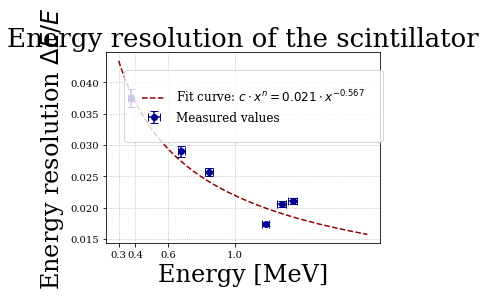

In [777]:
newrange = np.linspace(0.3,1.8,100)

#Plotting the result
plt.plot(newrange,powerlaw(newrange,*popt2), color = 'darkred', ls = '--', label = 'Fit curve: $c\cdot x^n = 0.021 \cdot x^{-0.567}$')
plt.errorbar(E, E_res, xerr = dE, yerr = E_res_err, color = 'darkblue', marker = 'o', ls = ' ', label = 'Measured values')
plt.title('Energy resolution of the scintillator', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.xticks([0.3, 0.4, 0.6, 1.0],['0.3', '0.4', '0.6', '1.0'])
plt.ylabel(r'Energy resolution $\Delta E/E$', size = 24)
#plt.xscale('log')
plt.grid(ls='dotted')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
#plt.text(845,2e-5, "Determined gain from fit: $ (1.218 \pm 0.006)$ keV/channel",bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=16)



#Saving the result
plt.tight_layout()
plt.savefig('FP82Plots/energy_resolution.pdf', format='PDF')

**Nachtmessung**

In [778]:
with open('FP82Data/Nachtmessung.txt', 'r+') as q:
    text = q.read()
    q.seek(0)
    q.truncate()
    q.write(text.replace(',', '.'))

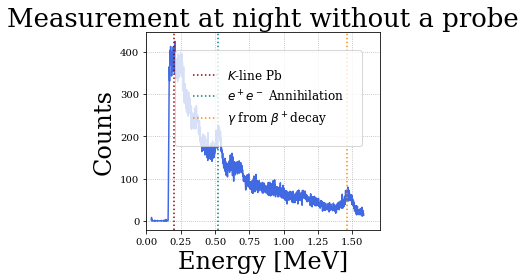

In [791]:
night = np.loadtxt(r'FP82Data/Nachtmessung.txt', unpack=True)
night = night[30:1300]
peaks_night = np.array([0.20, 0.52, 1.46]) #np.array([0.0864, 0.52, 1.46])
fwhm_night = np.array([0.0045, 0.01, 0.06])

#Plotting the result
plt.plot(energies, night, color = 'royalblue')
plt.title('Measurement at night without a probe', size = 26)
plt.xlabel('Energy [MeV]', size = 24)
plt.ylabel('Counts', size = 24)
plt.xlim(0,1.7)
plt.grid(ls='dotted')

plt.axvline(x = peaks_night[0], ls = 'dotted', color = 'darkred', lw = 1.5, label = r'$K$-line Pb')
plt.axvline(x = peaks_night[1], ls = 'dotted', color = 'teal', lw = 1.5, label = r'$e^+e^- $ Annihilation')
plt.axvline(x = peaks_night[2], ls = 'dotted', color = 'darkorange', lw = 1.5, label = r'$\gamma $ from $\beta^+ $decay')

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')


#Saving the result
plt.tight_layout()
plt.savefig('FP82Plots/night.pdf')